#### Utiliser la bibliothèque Faker pour générer des données fictives et les indexe dans Elasticsearch, un moteur de recherche et d'analyse de données.

In [4]:
import pickle
import pandas as pd
from faker import Faker         # un module qui permet de générer des données fictives         
from elasticsearch import Elasticsearch         # un module qui permet d'interagir avec Elasticsearch depuis Python
from Modeling import X_test,y_pred,confidence


In [5]:
with open('nlp_pipeline.pkl', 'rb') as file:
    nlp_pipeline = pickle.load(file)


In [6]:
data_clean= pd.read_csv("../data/clean_data.csv")


In [7]:
# Connexion à Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Alimentation de l'index "notes" avec les données factices et les prédictions
fake = Faker()
for i, emotion, conf in zip(range(len(X_test)), y_pred, confidence):
    document = {
        "patient_lastname": fake.last_name(),
        "patient_firstname": fake.first_name(),
        "text": data_clean['clean_text'][i],
        "date": fake.date_this_decade(),
        "patient_left": fake.boolean(),
        "emotion": y_pred[i],
        "confidence": confidence[i]
    }
    es.index(index="notes2", body=document)

# Vérification des résultats
search_query = {
    "query": {
        "match": {
            "emotion": "happy"  # Émotion à rechercher
        }
    }
}

search_results = es.search(index="notes2", body=search_query)
for hit in search_results["hits"]["hits"]:
    print(f"Emotion: {hit['_source']['emotion']}, Confidence: {hit['_source']['confidence']}")


/tmp/ipykernel_117888/3443868715.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  es.index(index="notes2", body=document)
/tmp/ipykernel_117888/3443868715.py:16: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.index(index="notes2", body=document)
/tmp/ipykernel_117888/3443868715.py:27: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)


Emotion: happy, Confidence: 0.5231996847165503
Emotion: happy, Confidence: 0.40182865877104257
Emotion: happy, Confidence: 0.7655663911347499
Emotion: happy, Confidence: 0.8459004268701387
Emotion: happy, Confidence: 0.2605887059263876
Emotion: happy, Confidence: 0.628869479265879
Emotion: happy, Confidence: 0.38405614990812686
Emotion: happy, Confidence: 0.6658740506816098
Emotion: happy, Confidence: 0.6187301126987258
Emotion: happy, Confidence: 0.8776179283899053


/tmp/ipykernel_117888/3443868715.py:27: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


In [8]:
# Vérification des résultats
search_query = {
    "query": {
        "match": {
            "emotion": "anger"  # Émotion à rechercher
        }
    }
}

search_results = es.search(index="notes2", body=search_query)
for hit in search_results["hits"]["hits"]:
    print(f"Emotion: {hit['_source']['emotion']}, Confidence: {hit['_source']['confidence']}")


Emotion: anger, Confidence: 0.7260893017467942
Emotion: anger, Confidence: 0.6494661737200706
Emotion: anger, Confidence: 0.2971605954865059
Emotion: anger, Confidence: 0.43314433347176295
Emotion: anger, Confidence: 0.7260059944532392
Emotion: anger, Confidence: 0.8842673167022596
Emotion: anger, Confidence: 0.7763694867826741
Emotion: anger, Confidence: 0.5502009007821632
Emotion: anger, Confidence: 0.37805145457176514
Emotion: anger, Confidence: 0.5995251239224669


/tmp/ipykernel_117888/35963937.py:10: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)
/tmp/ipykernel_117888/35963937.py:10: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


In [9]:
# Rechercher tous les documents dans l'index "notes"
response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch. 
# La réponse contient les documents correspondants. Les documents sont extraits en accédant à response['hits']['hits'].


# Récupérer les documents à partir de la réponse
documents = response['hits']['hits']

# Parcourir les documents et afficher leurs données
for doc in documents:
    print("ID du document :", doc['_id'])     # L'ID du document est accessible via doc['_id'].
    print("Données du document :", doc['_source'])      # Les données du document sont accessibles via doc['_source'].
    print("--------------------")


/tmp/ipykernel_117888/2109587630.py:2: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch.
/tmp/ipykernel_117888/2109587630.py:2: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch.


ID du document : 0EvrIIkB8LqwVNGagQg6
Données du document : {'patient_lastname': 'Davies', 'patient_firstname': 'Charles', 'text': 'i didnt feel humiliated', 'date': '2021-03-29', 'patient_left': False, 'emotion': 'happy', 'confidence': 0.5231996847165503}
--------------------
ID du document : 0UvrIIkB8LqwVNGagQhX
Données du document : {'patient_lastname': 'Rocha', 'patient_firstname': 'Kenneth', 'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'date': '2022-03-09', 'patient_left': True, 'emotion': 'anger', 'confidence': 0.7260893017467942}
--------------------
ID du document : 0kvrIIkB8LqwVNGagQht
Données du document : {'patient_lastname': 'Garrison', 'patient_firstname': 'Katrina', 'text': 'im grabbing a minute to post i feel greedy wrong', 'date': '2022-09-15', 'patient_left': False, 'emotion': 'sadness', 'confidence': 0.4477749266394086}
--------------------
ID du document : 00vrIIkB8LqwVNGagQiF
Données du docum

In [10]:
from elasticsearch import Elasticsearch
import pandas as pd

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Patient spécifique
patient_lastname = "Davies"
patient_firstname = "Charles"

# Requête Elasticsearch pour récupérer les documents du patient spécifique
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents correspondants
documents = response['hits']['hits']

# Liste pour stocker les sentiments
sentiments = []

# Parcourir les documents et extraire les sentiments
for doc in documents:
    sentiment = doc['_source']['emotion']
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Effectuer l'agrégation et le comptage des sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Afficher la répartition des sentiments
print(sentiment_counts)

Sentiment
happy    1
Name: count, dtype: int64


/tmp/ipykernel_117888/230937345.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_117888/230937345.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


In [11]:
from elasticsearch import Elasticsearch
import pandas as pd

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Patient spécifique
patient_lastname = "Christensen"
patient_firstname = "Anthony"

# Requête Elasticsearch pour récupérer les documents du patient spécifique
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents correspondants
documents = response['hits']['hits']

# Liste pour stocker les sentiments
sentiments = []

# Parcourir les documents et extraire les sentiments
for doc in documents:
    sentiment = doc['_source']['emotion']
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Effectuer l'agrégation et le comptage des sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Afficher la répartition des sentiments
print(sentiment_counts)

Sentiment
sadness    1
Name: count, dtype: int64


/tmp/ipykernel_117888/3010663931.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_117888/3010663931.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


/tmp/ipykernel_117888/495325489.py:25: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)
/tmp/ipykernel_117888/495325489.py:25: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


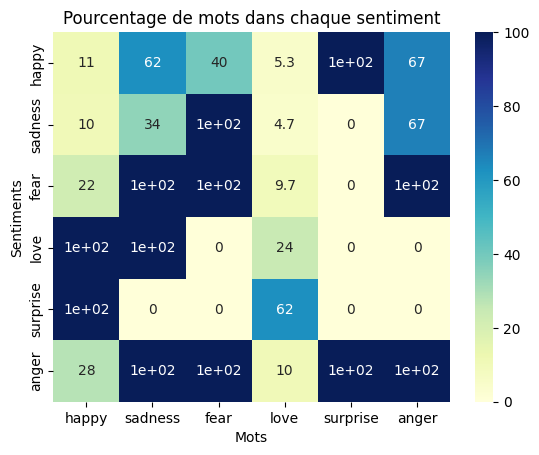

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des sentiments
sentiments = ['happy', 'sadness', 'fear', 'love', 'surprise', 'anger']  # Ajoutez tous les sentiments que vous souhaitez inclure

# Initialisation de la matrice
matrix = []

# Recherche du pourcentage de chaque sentiment contenant certains mots
for sentiment in sentiments:
    percentages = []
    for word in['happy', 'sadness', 'fear', 'love', 'surprise', 'anger']:  # Ajoutez tous les mots que vous souhaitez rechercher
        search_query = {
            "query": {
                "bool": {
                    "must": [
                        {"match": {"emotion": sentiment}},
                        {"match": {"text": word}}
                    ]
                }
            }
        }
        search_results = es.search(index="notes2", body=search_query)
        total_count = search_results["hits"]["total"]["value"]
        match_count = len(search_results["hits"]["hits"])

        # Vérification pour éviter la division par zéro
        percentage = 0
        if total_count != 0:
            percentage = match_count / total_count * 100

        percentages.append(percentage)
    
    matrix.append(percentages)

# Création de la HeatMap
heatmap_df = pd.DataFrame(matrix, columns=['happy', 'sadness', 'fear', 'love', 'surprise', 'anger'], index=sentiments)
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.xlabel("Mots")
plt.ylabel("Sentiments")
plt.title("Pourcentage de mots dans chaque sentiment")
plt.show()


In [13]:
stages_of_grief = ['denial', 'anger', 'bargaining', 'depression', 'acceptance']

# Recherche du nombre de textes correspondants pour chaque étape du deuil
for stage in stages_of_grief:
    # Recherche pleine
    full_text_query = {
        "query": {
            "match": {
                "text": stage
            }
        }
    }
    full_text_results = es.search(index="notes2", body=full_text_query)
    full_text_count = full_text_results["hits"]["total"]["value"]
    
    # Recherche fuzzy
    fuzzy_query = {
        "query": {
            "fuzzy": {
                "text": {
                    "value": stage,
                    "fuzziness": "AUTO"
                }
            }
        }
    }
    fuzzy_results = es.search(index="notes2", body=fuzzy_query)
    fuzzy_count = fuzzy_results["hits"]["total"]["value"]
    
    print(f"Stage: {stage}, Full Text Count: {full_text_count}, Fuzzy Count: {fuzzy_count}")


/tmp/ipykernel_117888/792079254.py:13: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  full_text_results = es.search(index="notes2", body=full_text_query)
/tmp/ipykernel_117888/792079254.py:13: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  full_text_results = es.search(index="notes2", body=full_text_query)
/tmp/ipykernel_117888/792079254.py:27: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  fuzzy_results = es.search(index="notes2", body=fuzzy_query)
/tmp/ipykernel_117888/792079254.py:27: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster co

Stage: denial, Full Text Count: 5, Fuzzy Count: 125
Stage: anger, Full Text Count: 40, Fuzzy Count: 65
Stage: bargaining, Full Text Count: 0, Fuzzy Count: 0
Stage: depression, Full Text Count: 20, Fuzzy Count: 45
Stage: acceptance, Full Text Count: 15, Fuzzy Count: 85
